In [1]:
import readspc
import os
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import struct

In [2]:
path = 'data/PNNL FTIR Data/Proposal 67367/Bruker Spectrometer/DATABASE-SERDP-4-0-Aug-2018-Acetol-Croto/'

In [3]:
def load_spc(fname):
    hdr, subhdr, x, y = readspc.read(fname)
    return hdr, subhdr, x, y

def load_spc_dir(dir):
    fnames = [file for p in os.walk(dir) for file in glob(os.path.join(p[0], '*.SPC'))]
    hdrs, subhdrs, xs, ys = [],[],[],[]
    for fname in fnames:
        hdr, subhdr, x, y = load_spc(fname)
        hdrs.append(hdr)
        subhdrs.append(subhdr)
        xs.append(x)
        ys.append(y)
    return fnames, hdrs, subhdrs, xs, ys

In [4]:
fnames,hdrs,subhdrs,xs,ys = load_spc_dir(path)


In [6]:
for fname, hdr, subhdr, x, y in zip(fnames,hdrs,subhdrs,xs,ys):
    file = fname.split('/')[-1].split('.')[0]
    plt.figure()
    plt.xlabel('Wavenumbers (1/cm)')
    plt.ylabel('Absorbance (base-10)')
    plt.plot(x,y)
    plt.title(file)
    plt.savefig('figures/'+file+'.png')
    plt.close()

In [7]:
df = pd.DataFrame(ys)

In [11]:
fname = "data/PNNL FTIR Data/Proposal 67367/Bruker Spectrometer/DATABASE-SERDP-4-0-Aug-2018-Acetol-Croto/Menthol/MENTHOL_25T.SPC"
hdr, subhdr, x, y = load_spc(fname)

In [17]:
y

array([[-3.610915e-06],
       [ 2.798264e-06],
       [-9.755429e-06],
       ...,
       [-5.773123e-06],
       [-8.064738e-06],
       [-7.908540e-06]], dtype=float32)

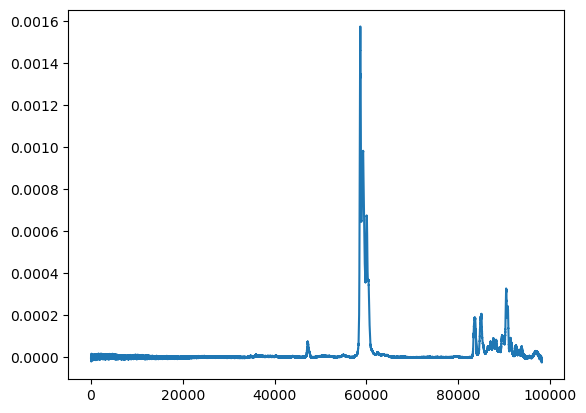

In [13]:
plt.plot(y)